3.124128938983508 +- 0.0337308028702787


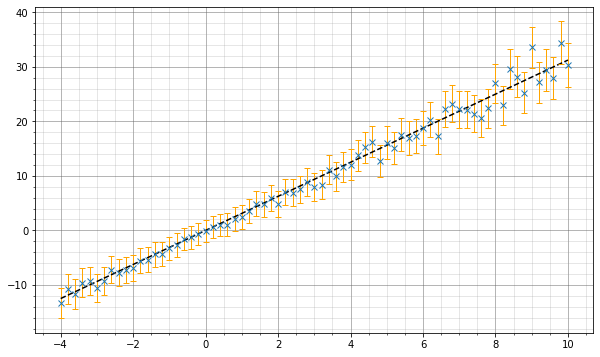

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize

xarr = []
yarr = []
yerror = []

# f(x) = mx

sample_size = 50
m = np.pi
noise = .6

for i in range(0, sample_size+20+1):
    x = (i-20)*0.2
    xarr.append(x)
    y = x*m + (0.33 + 0.33*np.abs(x)) * random.gauss(0, noise)
    yarr.append(y)
    yerror.append(noise*(3.3 + 0.33*np.abs(x)))

# write data into file
f = open("linear.txt", "w")
for i in range(0, len(xarr)):
    f.write(str(xarr[i]) + " " + str(yarr[i]) + " " + str(yerror[i]) + "\n")
f.close()

# convert list to np-array
xarr = np.array(xarr)
yarr = np.array(yarr)
yerror = np.array(yerror)

# create figure object
plt.figure(figsize=(10,6))

# draw gridlines for better overview
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# define fit function
def fit_func(x, a):
    return (a * x)

# diag elem sind varianzen; sqrt(varianz)= std_abw = Fehler
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr, p0=[0])
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))
# plot fit curve
plt.plot(xarr, fit_func(xarr, *params), '--k')

# plot data
plt.errorbar(xarr, yarr, yerror, fmt='x', linewidth=1, ecolor="orange", capsize=3)
plt.show()

13.551296553705173 +- 0.279175156588641
2.0056040841335907 +- 0.0041637970114824716
6.015793217033074 +- 0.049583159716408545
7.882766290274306 +- 0.24611385012145306


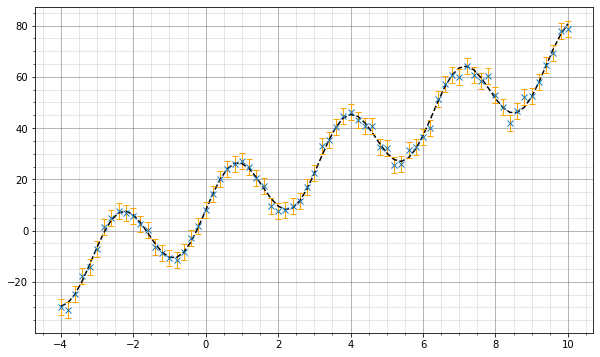

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize

xarr = []
yarr = []
yerror = []

# f(x) = a*sin(t*w) + m*t + b

sample_size = 50
a = 14.0
w = 2.0
m = 6.0
b = 8.0
noise = .6

for i in range(0, sample_size+20+1):
    x = (i-20)*0.2
    xarr.append(x)
    y = a*(np.sin(x*w)) + x*m + b + (1.0 + 0.33*np.abs(x)) * random.gauss(0, noise)
    yarr.append(y)
    yerror.append(noise*4*1.3)

# write data into file
f = open("rising_sin.txt", "w")
for i in range(0, len(xarr)):
    f.write(str(xarr[i]) + " " + str(yarr[i]) + " " + str(yerror[i]) + "\n")
f.close()

# convert list to np-array
xarr = np.array(xarr)
yarr = np.array(yarr)
yerror = np.array(yerror)

# create figure object
plt.figure(figsize=(10,6))

# draw gridlines for better overview
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# define fit function
def fit_func(x, a, b, c, d):
    return a*(np.sin(x*b)) + x*c + d

# diag elem sind varianzen; sqrt(varianz)= std_abw = Fehler
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr, p0=[3, 2, 3, 3])
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))
# plot fit curve
plt.plot(xarr, fit_func(xarr, *params), '--k')

# plot data
plt.errorbar(xarr, yarr, yerror, fmt='x', linewidth=1, ecolor="orange", capsize=3)
plt.show()